## Home Regression

* Student name: **Daniel M. Smith**
* Student pace: **Full Time**
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:


## Stakeholder
We are a small company looking for houses to purchase and remodel and either rent or sell in the Kings County, WA housing market. We will gather a list of target houses to inspect as potential investment properties.



In [277]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/kc_house_data.csv')

**Columns**<br>
id - unique identified for a house<br>
date - house was sold<br>
price - is prediction target<br>
bedrooms- of Bedrooms/House<br>
bathrooms- of bathrooms/bedrooms<br>
sqft_living - footage of the home<br>
sqft_lot - footage of the lot<br>
floors - Total floors (levels) in house<br>
waterfront - House which has a view to a waterfront<br>
view - Has been viewed<br>
condition - How good the condition is ( Overall )<br>
grade - overall grade given to the housing unit, based on King County grading system<br>
sqft_above - square footage of house apart from basement<br>
sqft_basement - square footage of the basement<br>
yr_built - Built Year<br>
yr_renovated - Year when house was renovated<br>
zipcode - zip<br>
lat - Latitude coordinate<br>
long - Longitude coordinate<br>
sqft_living15 - The avg square footage of interior housing living space for the nearest 15 neighbors<br>
sqft_lot15 - The avg square footage of the land lots of the nearest 15 neighbors<br>


In [278]:
data.shape

(21597, 21)

In [279]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [281]:
data['waterfront'].sort_values(ascending=False)

14760    1.0
11103    1.0
1166     1.0
17753    1.0
300      1.0
        ... 
21578    NaN
21582    NaN
21586    NaN
21587    NaN
21595    NaN
Name: waterfront, Length: 21597, dtype: float64

In [282]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [283]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [284]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

11% of waterfront is NaN<br>
18% of yr_renovated is NaN<br>
.2% of view is NaN<br>
We will set Nan to 0.0 for Nans

**Handling Nan Values**

In [285]:
data['waterfront'] = data['waterfront'].fillna(0.0)

In [286]:
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)

In [287]:
data['view'] = data['view'].fillna(0.0)

**Rename date column to date last sold**

In [315]:
data = data.rename(columns = {"date":"lastSoldDate"})
data['month'] = pd.to_datetime(data['lastSoldDate']).dt.month
data.drop(columns=['lastSoldDate'], inplace=True, axis = 1)

KeyError: 'lastSoldDate'

In [316]:
#Covers 70 zipcodes
data.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Observations:sqft_basement should be converted to a float64 not an object
also has ? which should be set to 0.0


In [317]:
#replacing '?'
data['sqft_basement'] = [0.0 if value == '?' else value for value in data['sqft_basement']]

In [318]:
data.loc[data["sqft_basement"] == '?']


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno


In [297]:
data["sqft_basement"] = pd.to_numeric(data["sqft_basement"])

Price column seems to be the price since last sold. This could be an oout of date column if it has been a long while since last sole.  We should make a 2 features, 1. age of home and 2. how many years since last sold.


Sqft_living15 seems to be an average of the 15 properties around
sqft_lot15 seems to be average of 15 lots around

In [319]:
data.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,6,6.0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,1,1.0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,6,6.0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,11,11.0
21596,1523300157,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,...,2008,0.0,98144,47.5941,-122.299,1020,1357,10,7,7.0


In [320]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,44.000324,42.054869
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,29.375234,28.945393
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,18.000000,16.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,40.000000,38.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,64.000000,61.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,115.000000,115.000000


The data is about houses in zipcodes around Seattle, WA.  
The dependent or response variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000. <br>
sq_ft living ranges from 370 to 13540 sf ft.  <br>
bedrooms range from 1 to 33 with a mean of 3.37 and median of 3. <br>
sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.<br>

**categorical data**<br>
zipcode-70 zipcodes<br>
grade-grade from kings county grading system 3-13<br>
condition-1 to 5 5 is best<br>
view- has been viewed 0-4<br>
waterfront- view of waterfront 0-1 being yes<br>


In [321]:
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [322]:
data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [323]:
data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [324]:
data.loc[data['sqft_living'] != (data['sqft_above'] + data['sqft_basement'])]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno
112,2525310310,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,...,1980,0.0,98038,47.3624,-122.031,1540,11656,9,35,35.0
115,3626039325,740500.0,3,3.50,4380,6350,2.0,0.0,0.0,3,...,1900,0.0,98117,47.6981,-122.368,1830,6350,11,115,115.0
309,3204800200,665000.0,4,2.75,3320,10574,2.0,0.0,0.0,5,...,1960,0.0,98056,47.5376,-122.180,2720,8330,1,55,55.0
384,713500030,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,3,...,1998,0.0,98006,47.5543,-122.148,4050,19009,7,17,17.0
508,5113400431,615000.0,2,1.00,1540,6872,1.0,0.0,0.0,4,...,1946,0.0,98119,47.6454,-122.373,1420,5538,5,69,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,291310180,379500.0,3,2.25,1410,1287,2.0,0.0,0.0,3,...,2005,0.0,98027,47.5344,-122.068,1490,1435,6,10,10.0
21109,3438500250,515000.0,5,3.25,2910,5027,2.0,0.0,0.0,3,...,2013,0.0,98106,47.5543,-122.359,2910,5027,6,2,2.0
21210,3278600680,235000.0,1,1.50,1170,1456,2.0,0.0,0.0,3,...,2007,0.0,98126,47.5493,-122.372,1360,1730,6,8,8.0
21356,6169901185,490000.0,5,3.50,4460,2975,3.0,0.0,2.0,3,...,2015,0.0,98119,47.6313,-122.370,2490,4231,5,0,0.0


In [325]:
data['age'] = 2015 - data['yr_built']

In [326]:
data['age']

0        60
1        64
2        82
3        50
4        28
         ..
21592     6
21593     1
21594     6
21595    11
21596     7
Name: age, Length: 21597, dtype: int64

In [306]:
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,60
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,64
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,50
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,28
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,5,14
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6,20
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,1,52
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,4,55
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,3,12


In [327]:
data['yrsince_reno'] = data['age']

In [328]:
data['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in data['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
data['yrsince_reno'] = data['yrsince_reno'].fillna(data['age'])

In [309]:
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,60,60.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,64,24.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,82,82.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,50,50.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,28,28.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,2001,0.0,98053,47.6561,-122.005,4760,101930,5,14,14.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,1995,0.0,98003,47.3097,-122.327,2238,6819,6,20,20.0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,1963,0.0,98198,47.4095,-122.315,1650,9711,1,52,52.0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,1960,0.0,98146,47.5123,-122.337,1780,8113,4,55,55.0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,2003,0.0,98038,47.3684,-122.031,2390,7570,3,12,12.0


In [329]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,44.000324,42.054869
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,29.375234,28.945393
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,18.000000,16.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,40.000000,38.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,64.000000,61.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,115.000000,115.000000


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [331]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'age', 'yrsince_reno'],
      dtype='object')

In [332]:
#rearrange Columns
data = data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'yr_built','age','condition', 'grade', 'waterfront',
        'yr_renovated','yrsince_reno', 'sqft_above', 'sqft_basement',  'view',  'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15' ]]

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   yr_built       21597 non-null  int64  
 8   age            21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  waterfront     21597 non-null  float64
 12  yr_renovated   21597 non-null  float64
 13  yrsince_reno   21597 non-null  float64
 14  sqft_above     21597 non-null  int64  
 15  sqft_basement  21597 non-null  float64
 16  view           21597 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [334]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,age,condition,...,yr_renovated,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,60,3,...,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,64,3,...,1991.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,82,3,...,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,50,5,...,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,28,3,...,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,6,3,...,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,1,3,...,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,6,3,...,0.0,6.0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,2004,11,3,...,0.0,11.0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287


In [335]:
data.to_csv('./data/kc_house_data_tidy.csv',encoding='utf-8')

---
---
---

In [ ]:
#EDA of data

In [340]:
hddf = pd.read_csv('./data/kc_house_data_tidy.csv')

In [344]:
hddf.drop(columns='Unnamed: 0',inplace=True)

In [341]:

hddf.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [345]:
hddf


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,waterfront,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,0.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,6,3,8,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,1,3,8,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,6,3,7,0.0,6.0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,11,3,8,0.0,11.0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287


In [346]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [347]:
for col in hddf:
    print(col.upper())
    print(hddf[col].value_counts())
    print('################')

ID
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
################
PRICE
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
################
BEDROOMS
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
################
BATHROOMS
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75 

<AxesSubplot:xlabel='long', ylabel='lat'>

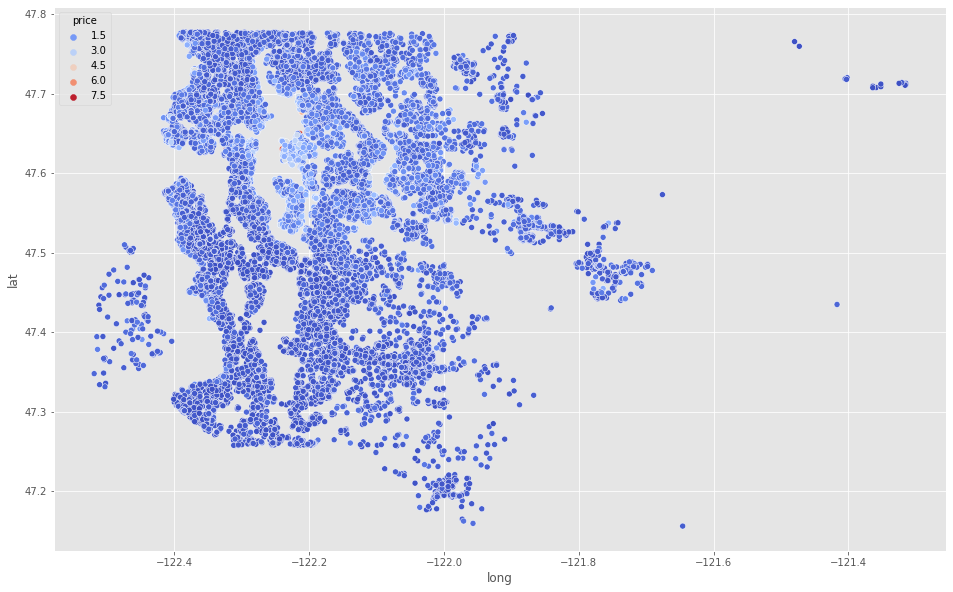

In [348]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='long', y='lat', data=hddf, hue='price', palette='coolwarm')

In [349]:
hddf.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'age', 'condition', 'grade', 'waterfront', 'yrsince_reno',
       'sqft_above', 'sqft_basement', 'view', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#define feature pertinent to model
feats_df = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'age', 'condition', 'grade', 'waterfront', 'yrsince_reno',
       'sqft_above', 'sqft_basement', 'view', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

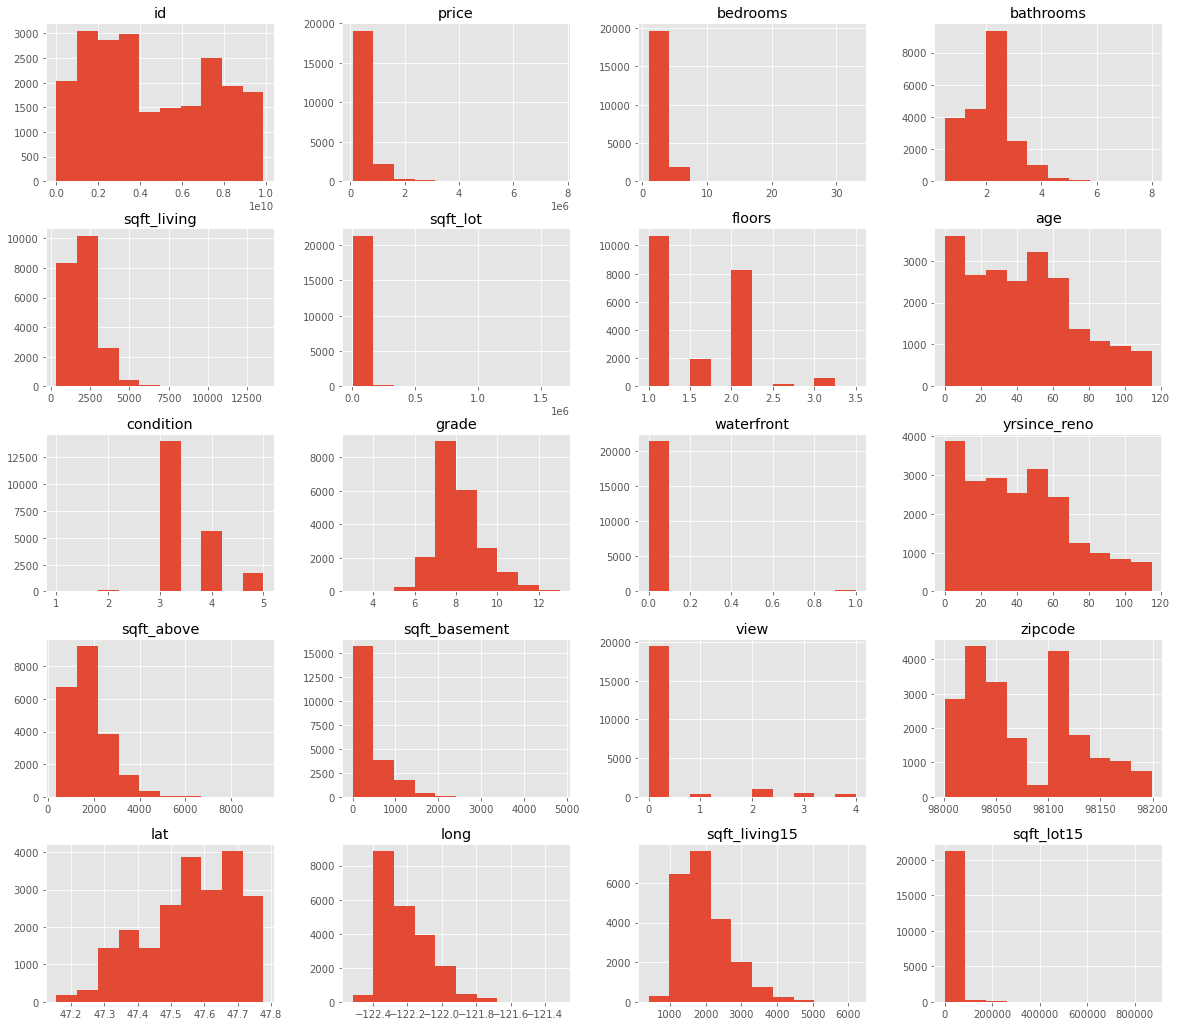

In [350]:
hddf.hist(figsize = (20,18));

Price looks to be right skewed.  We will look for linearity between different pairs of data.
## Check for Linearity

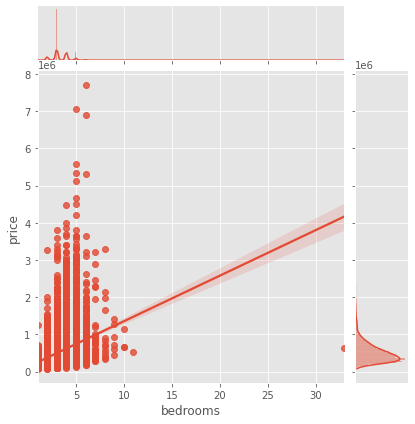

In [354]:
sns.jointplot(x='bedrooms',y='price', data=hddf, kind='reg');

In [355]:
Observation: A Big outlier of 30+ bedrooms. Note: we should remove the outlier. 

SyntaxError: invalid syntax (<ipython-input-355-86da42318b46>, line 1)

In [ ]:
sns.jointplot(x='bathrooms',y='price', data=hddf, kind='reg');

In [ ]:
sns.jointplot(x='sqft_living',y='price', data=hddf, kind='reg');

Is linear? not truly but somewhat

In [ ]:
sns.jointplot(x='sqft_lot',y='price', data=hddf, kind='reg');

not linear

In [ ]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

In [ ]:
not linear

In [ ]:
sns.jointplot(x='grade',y='price', data=hddf, kind='reg');

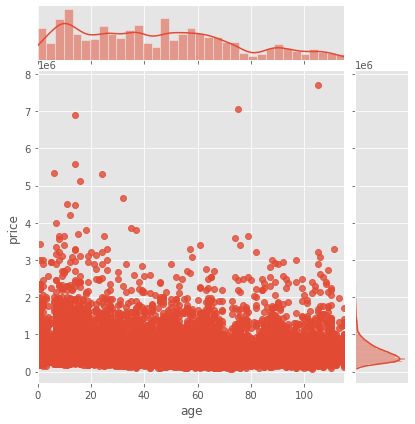

In [357]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

## Check for multicolinearity in features

In [ ]:
corr = hddf[feats_df].corr()
corr

In [ ]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

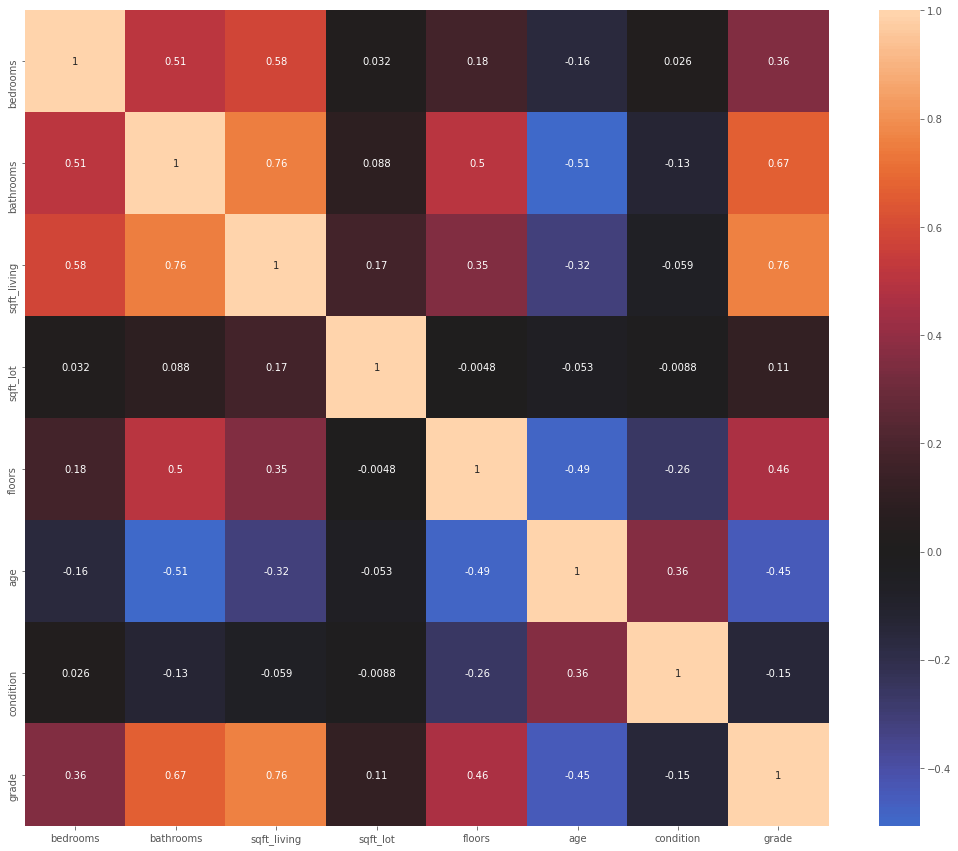

In [356]:
plt.figure(figsize=(18,15))
sns.heatmap(corr, center=0, annot=True);

# Model Building 
## Baseline model

In [358]:
hddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   age            21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  waterfront     21597 non-null  float64
 11  yrsince_reno   21597 non-null  float64
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  view           21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [359]:
from statsmodels.formula.api import ols

In [360]:
outcome = 'price'
predictors_df = hddf.drop(['id', 'price', ], axis = 1)
predictor_variables = "+".join(predictors_df.columns)
formula = outcome + '~' + predictor_variables

In [361]:
predictor_variables

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+age+condition+grade+waterfront+yrsince_reno+sqft_above+sqft_basement+view+zipcode+lat+long+sqft_living15+sqft_lot15'

In [362]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+age+condition+grade+waterfront+yrsince_reno+sqft_above+sqft_basement+view+zipcode+lat+long+sqft_living15+sqft_lot15'

In [363]:
baseline_model = ols(formula = formula, data = hddf).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        01:01:19   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.329e+06   2.88e+06      0.461      0.645   -4.33e+06    6.98e+06
bedrooms      -3.592e+04   1901.055    -18.897      0.000   -3.97e+04   -3.22e+04
bathrooms      4.167e+04   3269.532     12.744      0.000    3.53e+04    4.81e+04
sqft_living     102.6395     18.081      5.677      0.000      67.200     138.079
sqft_lot          0.1287      0.048      2.684      0.007       0.035       0.223
floors         6726.8993   3605.553      1.866      0.062    -340.250    1.38e+04
age            3312.9565    127.530     25.978      0.000    3062.987    3562.926
condition      2.678e+04   2353.707     11.380      0.000    2.22e+04    3.14e+04
grade          9.676e+04   2162.791     44.738      0.000    9.25e+04    1.01e+05
waterfront      6.21e+05   1.81e+04     34.256      0.000    5.85e+05    6.56e+05
yrsince_reno   -676.0185    131.088     -5.157      0.000    -932.962    -419.075
sqft_above       78.4711     18.072      4.342      0.000      43.048     113.894
sqft_basement    47.7765     17.911      2.667      0.008      12.670      82.883
view           5.345e+04   2122.012     25.188      0.000    4.93e+04    5.76e+04
zipcode        -584.6090     32.998    -17.716      0.000    -649.288    -519.930
lat            6.008e+05   1.07e+04     55.922      0.000     5.8e+05    6.22e+05
long          -2.179e+05   1.32e+04    -16.553      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.5861      3.453      6.252      0.000      14.818      28.354
sqft_lot15       -0.3869      0.073     -5.273      0.000      -0.531      -0.243
==============================================================================
Omnibus:                    18331.569   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1823772.872
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      47.452   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusions from baseline model:

1. Drop **id** as its not a relevant feature (even though it has a good p-value doesn't really tell us anything)
2. **Bedrooms** has a negative coefficient -> As bedrooms increase, price decreases. 
3. Price per sqft is about $102
4. **Yr_Built** has a negative coefficient
5. **Zipcode** has a negative coefficent. need to look into how to get location data in the model
6. **sqft_lot15** has a neg coef  
7. **yrsince_reno**
8. **floors** .062 not relevant

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [365]:
X = predictors_df
y = hddf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [366]:
baseline_linreg = LinearRegression()
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [367]:
y_pred = baseline_linreg.predict(X_test)

In [368]:
residuals = y_pred - y_test

In [369]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age',
       'condition', 'grade', 'waterfront', 'yrsince_reno', 'sqft_above',
       'sqft_basement', 'view', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [370]:
baseline_linreg.coef_

array([-3.89688786e+04,  4.15896223e+04,  1.24070917e+02,  1.69028472e-01,
        1.08304695e+04,  3.23425813e+03,  2.51784144e+04,  9.82927953e+04,
        6.01867568e+05, -5.70846507e+02,  5.19520944e+01,  2.98032950e+01,
        5.42902143e+04, -5.93251557e+02,  5.98034512e+05, -2.08357883e+05,
        2.43185044e+01, -4.40182678e-01])

In [371]:
from sklearn.metrics import mean_squared_error

In [372]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 199867.60910058717
Test RMSE: 205457.75418752249


In [373]:
import statsmodels.api as sm
import scipy.stats as stats

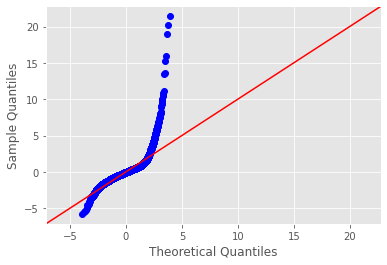

In [374]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

## Model 2 -  Dealing with outliers

In [375]:
hddf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
age,21597.0,4.400032e+01,2.937523e+01,0.000000e+00,1.800000e+01,4.000000e+01,6.400000e+01,1.150000e+02
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [399]:
hddf_no_out = hddf[hddf.bathrooms >= 1]

In [ ]:
#removed 75 rows based off bathroom outliers


In [ ]:
#Clean outliers where z score is > 3

In [419]:
z = np.abs(stats.zscore(hddf_no_out))
print(z)

[[0.88519717 0.86846203 0.4100402  ... 0.30658272 0.94639815 0.26006107]
 [0.63667269 0.00860214 0.4100402  ... 0.74828667 0.43556223 0.18715978]
 [0.36472761 0.98243903 1.49404526 ... 0.13560055 1.0677549  0.17165589]
 ...
 [1.50076899 0.49280037 0.4100402  ... 0.94064161 0.66908723 0.41183796]
 [0.70129178 0.38399178 0.67396486 ... 1.05462973 0.23122787 0.20325011]
 [1.49093154 0.38399178 0.4100402  ... 1.03277764 0.84423097 0.41997476]]


In [401]:
threshold = 3
print(np.where(z > threshold))

(array([   21,   153,   245,   267,   280,   298,   310,   514,   536,
         552,   651,   774,   809,  1024,  1144,  1153,  1156,  1208,
        1263,  1273,  1306,  1352,  1410,  1423,  1438,  1665,  1719,
        1721,  1759,  1933,  1934,  2027,  2072,  2123,  2127,  2166,
        2187,  2223,  2253,  2306,  2430,  2447,  2459,  2551,  2612,
        2843,  2849,  2884,  2959,  3005,  3019,  3023,  3075,  3140,
        3211,  3240,  3263,  3319,  3325,  3365,  3499,  3713,  3726,
        3739,  3747,  3755,  3790,  3838,  3848,  3891,  3990,  4009,
        4012,  4126,  4167,  4194,  4243,  4314,  4380,  4382,  4385,
        4402,  4460,  4609,  4736,  4785,  4833,  4895,  4896,  5405,
        5421,  5423,  5561,  5572,  5589,  5673,  5720,  5798,  5800,
        5834,  5850,  5937,  6011,  6015,  6164,  6166,  6202,  6304,
        6371,  6468,  6470,  6477,  6660,  6683,  6709,  6740,  6751,
        6762,  6969,  7002,  7044,  7094,  7158,  7219,  7278,  7280,
        7354,  7382

In [420]:
hddf_no_out = hddf_no_out[(z < 3).all(axis=1)]

In [384]:
1000/22000

0.045454545454545456

In [421]:
hddf_no_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19376.0,4.639711e+09,2.867001e+09,1.000102e+06,2.202500e+09,4.003000e+09,7.346850e+09,9.900000e+09
price,19376.0,4.859040e+05,2.353590e+05,8.200000e+04,3.150000e+05,4.350000e+05,6.020000e+05,1.640000e+06
bedrooms,19376.0,3.328344e+00,8.491080e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
bathrooms,19376.0,2.045688e+00,6.884950e-01,1.000000e+00,1.500000e+00,2.000000e+00,2.500000e+00,4.250000e+00
sqft_living,19376.0,1.955908e+03,7.385957e+02,3.900000e+02,1.400000e+03,1.850000e+03,2.420000e+03,4.750000e+03
sqft_lot,19376.0,9.832797e+03,1.148190e+04,5.200000e+02,5.000000e+03,7.350000e+03,9.892250e+03,1.372140e+05
floors,19376.0,1.482169e+00,5.386286e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
age,19376.0,4.435152e+01,2.942643e+01,0.000000e+00,1.900000e+01,4.100000e+01,6.400000e+01,1.150000e+02
condition,19376.0,3.414637e+00,6.441322e-01,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,19376.0,7.537675e+00,1.021839e+00,5.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.100000e+01


In [396]:
hddf_no_out

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,waterfront,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,0.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,1010000.0,4,3.50,3510,7200,2.0,6,3,9,0.0,6.0,2600,910.0,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,7,3,8,0.0,7.0,1180,130.0,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,6,3,8,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,1,3,8,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200


C:\Users\dsmith\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

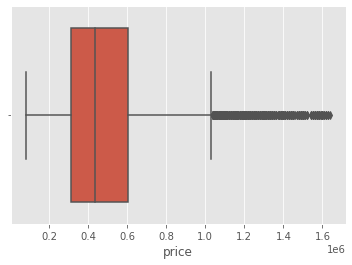

In [422]:
sns.boxplot(hddf_no_out.price)

## Model 2


In [423]:
hddf_no_out.shape

(19376, 20)

In [424]:
outcome = 'price'
predictors = hddf_no_out.drop(columns = ['price', 'id'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [425]:
model_2 = ols(formula = formula, data = hddf_no_out).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2422.
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        02:46:28   Log-Likelihood:            -2.5611e+05
No. Observations:               19376   AIC:                         5.123e+05
Df Residuals:                   19358   BIC:                         5.124e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.654e+06   2.04e+06     -2.772      0.006   -9.65e+06   -1.66e+06
bedrooms      -1.456e+04   1472.129     -9.892      0.000   -1.74e+04   -1.17e+04
bathrooms      2.917e+04   2431.819     11.994      0.000    2.44e+04    3.39e+04
sqft_living      80.0878     13.852      5.782      0.000      52.937     107.239
sqft_lot          0.2635      0.145      1.818      0.069      -0.021       0.548
floors         2.852e+04   2616.434     10.900      0.000    2.34e+04    3.36e+04
age            2769.5269     93.096     29.749      0.000    2587.051    2952.003
condition      2.817e+04   1670.712     16.861      0.000    2.49e+04    3.14e+04
grade           8.68e+04   1582.911     54.835      0.000    8.37e+04    8.99e+04
waterfront     2.055e-06   7.42e-07      2.772      0.006    6.02e-07    3.51e-06
yrsince_reno   -596.2858     95.423     -6.249      0.000    -783.323    -409.248
sqft_above       17.9414     13.826      1.298      0.194      -9.158      45.041
sqft_basement    13.3522     13.721      0.973      0.330     -13.542      40.246
view           4.021e+04   2441.224     16.470      0.000    3.54e+04     4.5e+04
zipcode        -356.4152     23.332    -15.276      0.000    -402.147    -310.683
lat            5.695e+05   7457.938     76.356      0.000    5.55e+05    5.84e+05
long          -1.051e+05   1.05e+04    -10.041      0.000   -1.26e+05   -8.45e+04
sqft_living15    45.4640      2.723     16.694      0.000      40.126      50.802
sqft_lot15       -1.3275      0.188     -7.059      0.000      -1.696      -0.959
==============================================================================
Omnibus:                     5144.729   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22533.952
Skew:                           1.240   Prob(JB):                         0.00
Kurtosis:                       7.665   Cond. No.                     8.52e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusions from model 2:

1. Sqft_Basement no longer relevant feature. Will need to drop it in the next model
2. sqft_lot no longer relevant feature. Will need to drop it in the next model

In [427]:
X = hddf_no_out.drop("price", axis = 1)
y = hddf_no_out['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [428]:
print(len(X_train))

print(len(X_test))

14532
4844


In [429]:
model2_linreg = LinearRegression()
model2_linreg.fit(X_train, y_train)
y_pred = model2_linreg.predict(X_test)
residuals = y_pred - y_test

In [430]:
model2_linreg.coef_

array([-9.85592156e-07, -1.37357018e+04,  2.81555456e+04,  8.77258719e+01,
        2.65910954e-01,  2.58716616e+04,  2.77882290e+03,  2.82323332e+04,
        8.64630497e+04, -6.09361450e-11, -6.10998580e+02,  1.35304872e+01,
        7.35576529e+00,  3.95024287e+04, -3.74019503e+02,  5.70987603e+05,
       -1.10805796e+05,  4.41030894e+01, -1.42247535e+00])

In [431]:
mse_train = mean_squared_error(y_train, model2_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 133624.80054871063
Test RMSE: 131482.08161334592


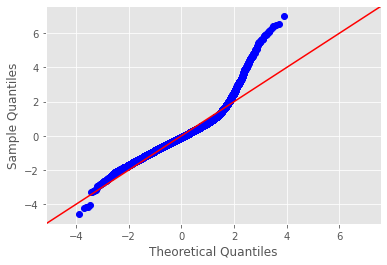

In [432]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

## Model 3 Fix Cat Features

In [434]:
hddf_no_out.condition.unique()

array([3, 5, 4, 2], dtype=int64)

In [435]:
hddf_no_out.grade.unique()

array([ 7,  6,  8,  9, 10,  5, 11], dtype=int64)

In [436]:
hddf_no_out.view.unique()

array([0., 2., 1.])

In [444]:
condition_dummies = pd.get_dummies(hddf_no_out['condition'], prefix = 'cond', drop_first= True)

In [438]:
grade_dummies = pd.get_dummies(hddf_no_out['grade'], prefix = 'grade', drop_first= True)

In [439]:
view_dummies = pd.get_dummies(hddf_no_out['view'], prefix = 'view', drop_first= True)

In [440]:
grade_dummies.shape

(19376, 6)

In [441]:
view_dummies.shape

(19376, 2)

In [445]:
hddf_no_out_dum = pd.concat([hddf_no_out,condition_dummies, grade_dummies, view_dummies], axis =1 )

In [446]:
hddf_no_out_dum.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,...,cond_4,cond_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_1.0,view_2.0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,...,0,1,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,...,0,0,0,0,1,0,0,0,0,0


In [448]:
hddf_no_out_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19376 entries, 0 to 21595
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19376 non-null  float64
 1   bedrooms       19376 non-null  int64  
 2   bathrooms      19376 non-null  float64
 3   sqft_living    19376 non-null  int64  
 4   sqft_lot       19376 non-null  int64  
 5   floors         19376 non-null  float64
 6   age            19376 non-null  int64  
 7   waterfront     19376 non-null  float64
 8   yrsince_reno   19376 non-null  float64
 9   sqft_above     19376 non-null  int64  
 10  zipcode        19376 non-null  int64  
 11  lat            19376 non-null  float64
 12  long           19376 non-null  float64
 13  sqft_living15  19376 non-null  int64  
 14  sqft_lot15     19376 non-null  int64  
 15  cond_3         19376 non-null  uint8  
 16  cond_4         19376 non-null  uint8  
 17  cond_5         19376 non-null  uint8  
 18  grade_

In [447]:
hddf_no_out_dum.drop(columns=['id', 'condition', 'view', 'grade', 'sqft_basement',], inplace = True)

In [453]:
hddf_no_out_dum.columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'age', 'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'cond_3', 'cond_4', 'cond_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'view_1', 'view_2']

In [454]:
hddf_no_out_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'age', 'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'cond_3', 'cond_4', 'cond_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'view_1', 'view_2'],
      dtype='object')

In [455]:
outcome = 'price'
predictors = hddf_no_out_dum.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [456]:
model_3 = ols(formula = formula, data = hddf_no_out_dum).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1771.
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        03:12:01   Log-Likelihood:            -2.5589e+05
No. Observations:               19376   AIC:                         5.118e+05
Df Residuals:                   19351   BIC:                         5.120e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.935e+06   2.03e+06     -1.445      0.149   -6.92e+06    1.05e+06
bedrooms      -1.061e+04   1473.916     -7.196      0.000   -1.35e+04   -7716.600
bathrooms      3.239e+04   2422.531     13.371      0.000    2.76e+04    3.71e+04
sqft_living      92.8861      3.455     26.887      0.000      86.115      99.657
sqft_lot          0.3004      0.144      2.093      0.036       0.019       0.582
floors          2.98e+04   2613.413     11.404      0.000    2.47e+04    3.49e+04
age            2712.2703     92.162     29.429      0.000    2531.625    2892.916
waterfront      8.69e-07   5.05e-08     17.224      0.000     7.7e-07    9.68e-07
yrsince_reno   -673.7613     94.713     -7.114      0.000    -859.408    -488.115
sqft_above       -5.0777      3.391     -1.498      0.134     -11.723       1.568
zipcode        -386.2418     23.249    -16.613      0.000    -431.811    -340.672
lat            5.773e+05   7397.569     78.035      0.000    5.63e+05    5.92e+05
long          -1.085e+05   1.04e+04    -10.462      0.000   -1.29e+05   -8.82e+04
sqft_living15    41.2822      2.708     15.244      0.000      35.974      46.590
sqft_lot15       -1.4198      0.186     -7.622      0.000      -1.785      -1.055
cond_3         1.812e+04   1.11e+04      1.629      0.103   -3679.122    3.99e+04
cond_4          4.64e+04   1.12e+04      4.156      0.000    2.45e+04    6.83e+04
cond_5          7.97e+04   1.15e+04      6.909      0.000    5.71e+04    1.02e+05
grade_6        3.513e+04   9884.510      3.554      0.000    1.58e+04    5.45e+04
grade_7        8.769e+04   9713.988      9.027      0.000    6.86e+04    1.07e+05
grade_8        1.642e+05   1.01e+04     16.281      0.000    1.44e+05    1.84e+05
grade_9        2.938e+05   1.08e+04     27.230      0.000    2.73e+05    3.15e+05
grade_10       3.927e+05   1.19e+04     33.048      0.000    3.69e+05    4.16e+05
grade_11       4.883e+05   1.64e+04     29.832      0.000    4.56e+05     5.2e+05
view_1         9.301e+04   7987.636     11.645      0.000    7.74e+04    1.09e+05
view_2         7.296e+04   4978.942     14.653      0.000    6.32e+04    8.27e+04
==============================================================================
Omnibus:                     4923.321   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21392.420
Skew:                           1.186   Prob(JB):                         0.00
Kurtosis:                       7.568   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-18. This might indicate that there are
strong multicollinearity problems or that the design mat

In [ ]:
Observations

In [457]:
X = hddf_no_out_dum.drop("price", axis = 1)
y = hddf_no_out_dum['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [458]:
print(len(X_train))

print(len(X_test))

14532
4844


In [459]:
model3_linreg = LinearRegression()
model3_linreg.fit(X_train, y_train)
y_pred = model3_linreg.predict(X_test)
residuals = y_pred - y_test

In [460]:
model3_linreg.coef_

array([-9.94192734e+03,  3.13096026e+04,  9.47141945e+01,  3.51703037e-01,
        2.72525278e+04,  2.72694776e+03, -1.24191502e-09, -6.87252947e+02,
       -3.23286280e+00, -4.02276718e+02,  5.78508860e+05, -1.14017728e+05,
        4.00574695e+01, -1.49949411e+00,  2.92678793e+04,  5.72431163e+04,
        9.04184167e+04,  3.52758880e+04,  8.85539555e+04,  1.65385456e+05,
        2.92305596e+05,  3.82535548e+05,  5.00107928e+05,  8.95116929e+04,
        7.25490957e+04])

In [461]:
mse_train = mean_squared_error(y_train, model3_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 132365.97574668218
Test RMSE: 129603.53951989136


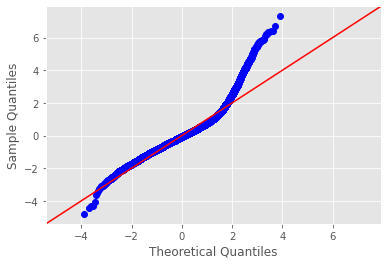

In [462]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

## Model 4 - Transformations

In [464]:
hddf_no_out_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19376 entries, 0 to 21595
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19376 non-null  float64
 1   bedrooms       19376 non-null  int64  
 2   bathrooms      19376 non-null  float64
 3   sqft_living    19376 non-null  int64  
 4   sqft_lot       19376 non-null  int64  
 5   floors         19376 non-null  float64
 6   age            19376 non-null  int64  
 7   waterfront     19376 non-null  float64
 8   yrsince_reno   19376 non-null  float64
 9   sqft_above     19376 non-null  int64  
 10  zipcode        19376 non-null  int64  
 11  lat            19376 non-null  float64
 12  long           19376 non-null  float64
 13  sqft_living15  19376 non-null  int64  
 14  sqft_lot15     19376 non-null  int64  
 15  cond_3         19376 non-null  uint8  
 16  cond_4         19376 non-null  uint8  
 17  cond_5         19376 non-null  uint8  
 18  grade_

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

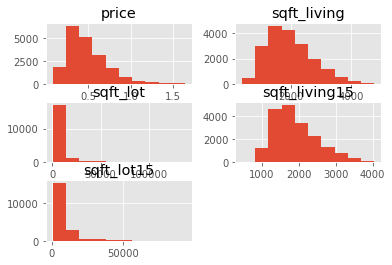

In [473]:
hddf_no_out_dum[['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].hist()

In [474]:
hddf_no_out_dum['log_price'] = np.log(hddf_no_out_dum['price'])
hddf_no_out_dum['log_sqft_living'] = np.log(hddf_no_out_dum['sqft_living'])
hddf_no_out_dum['log_sqft_lot'] = np.log(hddf_no_out_dum['sqft_lot'])
hddf_no_out_dum['log_sqft_living15'] = np.log(hddf_no_out_dum['sqft_living15'])
hddf_no_out_dum['log_sqft_lot15'] = np.log(hddf_no_out_dum['sqft_lot15'])

array([[<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'log_sqft_living'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot'}>,
        <AxesSubplot:title={'center':'log_sqft_living15'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

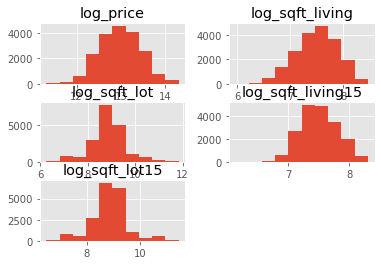

In [479]:
hddf_no_out_dum[['log_price','log_sqft_living', 'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15']].hist()

In [480]:
hddf_log = hddf_no_out_dum.drop(columns = ['price','sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'cond_3'], axis = 1)

In [481]:
outcome = 'log_price'
predictors = hddf_log.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [482]:
model_4 = ols(formula = formula, data = hddf_log).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2444.
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        03:32:11   Log-Likelihood:                 307.16
No. Observations:               19376   AIC:                            -568.3
Df Residuals:                   19353   BIC:                            -387.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.7094      3.699     -1.003      0.316     -10.960       3.541
bedrooms             -0.0207      0.003     -7.628      0.000      -0.026      -0.015
bathrooms             0.0559      0.004     12.769      0.000       0.047       0.064
floors                0.0366      0.005      8.128      0.000       0.028       0.045
age                   0.0048      0.000     28.940      0.000       0.004       0.005
waterfront        -2.133e-13   2.14e-13     -0.999      0.318   -6.32e-13    2.05e-13
yrsince_reno         -0.0010      0.000     -5.848      0.000      -0.001      -0.001
zipcode              -0.0006   4.21e-05    -13.986      0.000      -0.001      -0.001
lat                   1.4029      0.013    104.933      0.000       1.377       1.429
long                 -0.0275      0.019     -1.482      0.138      -0.064       0.009
cond_4                0.0605      0.004     13.882      0.000       0.052       0.069
cond_5                0.1176      0.007     16.898      0.000       0.104       0.131
grade_6               0.1411      0.018      7.877      0.000       0.106       0.176
grade_7               0.2798      0.018     15.772      0.000       0.245       0.315
grade_8               0.4392      0.019     23.735      0.000       0.403       0.475
grade_9               0.6422      0.020     32.624      0.000       0.604       0.681
grade_10              0.7682      0.021     35.895      0.000       0.726       0.810
grade_11              0.8709      0.029     29.753      0.000       0.813       0.928
view_1                0.1630      0.014     11.300      0.000       0.135       0.191
view_2                0.1284      0.009     14.312      0.000       0.111       0.146
log_sqft_living       0.3420      0.010     35.737      0.000       0.323       0.361
log_sqft_lot         -0.0067      0.006     -1.155      0.248      -0.018       0.005
log_sqft_living15     0.2295      0.009     24.640      0.000       0.211       0.248
log_sqft_lot15       -0.0637      0.006    -10.149      0.000      -0.076      -0.051
==============================================================================
Omnibus:                      285.082   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.433
Skew:                           0.023   Prob(JB):                    3.64e-119
Kurtosis:                       3.821   Cond. No.                     5.44e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
observations
1. log_sqft_lot no longer relevant
2. long no longer relevant
3. waterfront no longer relevnant

In [483]:
X = hddf_log.drop("log_price", axis = 1)
y = hddf_log['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [484]:
model4_linreg = LinearRegression()
model4_linreg.fit(X_train, y_train)
y_pred = model4_linreg.predict(X_test)
residuals = y_pred - y_test

In [485]:
model4_linreg.coef_

array([-1.89107677e-02,  5.63565293e-02,  3.33876741e-02,  4.81951808e-03,
        1.20736754e-15, -9.56735389e-04, -6.04671477e-04,  1.40594777e+00,
       -3.81479258e-02,  5.84776975e-02,  1.13659168e-01,  1.57287915e-01,
        2.96642849e-01,  4.56601508e-01,  6.56158167e-01,  7.70347410e-01,
        8.97454992e-01,  1.57341876e-01,  1.30140658e-01,  3.45921587e-01,
       -1.05876125e-02,  2.27586605e-01, -5.87291130e-02])

In [486]:
mse_train = mean_squared_error(y_train, model4_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.23879456527279405
Test RMSE: 0.23646595549225607


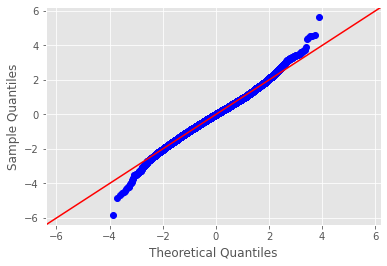

In [487]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
Observations

## Model 5

In [ ]:
1. log_sqft_lot no longer relevant
2. long no longer relevant
3. waterfront no longer relevnant

In [488]:
hddf_log5 = hddf_log.drop(columns = ['long', 'log_sqft_lot', 'waterfront' ], axis = 1)

In [489]:
hddf_log5.head()

,bedrooms,bathrooms,floors,age,yrsince_reno,zipcode,lat,cond_4,cond_5,grade_6,...,grade_8,grade_9,grade_10,grade_11,view_1,view_2,log_sqft_living,log_sqft_living15,log_sqft_lot15,log_price
0,3,1.00,1.0,60,60.0,98178,47.5112,0,0,0,...,0,0,0,0,0,0,7.073270,7.200425,8.639411,12.309982
1,3,2.25,2.0,64,24.0,98125,47.7210,0,0,0,...,0,0,0,0,0,0,7.851661,7.432484,8.941022,13.195614
2,2,1.00,1.0,82,82.0,98028,47.7379,0,0,1,...,0,0,0,0,0,0,6.646391,7.908387,8.994917,12.100712
3,4,3.00,1.0,50,50.0,98136,47.5208,0,1,0,...,0,0,0,0,0,0,7.580700,7.215240,8.517193,13.311329
4,3,2.00,1.0,28,28.0,98074,47.6168,0,0,0,...,1,0,0,0,0,0,7.426549,7.495542,8.923058,13.142166


In [490]:
outcome = 'log_price'
predictors = hddf_log5.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [491]:
model_5 = ols(formula = formula, data = hddf_log5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2688.
Date:                Thu, 27 May 2021   Prob (F-statistic):               0.00
Time:                        03:43:43   Log-Likelihood:                 305.21
No. Observations:               19376   AIC:                            -568.4
Df Residuals:                   19355   BIC:                            -403.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.3274      3.639     -0.914      0.361     -10.460       3.806
bedrooms             -0.0206      0.003     -7.612      0.000      -0.026      -0.015
bathrooms             0.0563      0.004     12.876      0.000       0.048       0.065
floors                0.0369      0.004      8.273      0.000       0.028       0.046
age                   0.0049      0.000     29.263      0.000       0.005       0.005
yrsince_reno         -0.0010      0.000     -5.840      0.000      -0.001      -0.001
zipcode              -0.0006   3.79e-05    -14.722      0.000      -0.001      -0.000
lat                   1.4021      0.013    105.337      0.000       1.376       1.428
cond_4                0.0608      0.004     13.958      0.000       0.052       0.069
cond_5                0.1177      0.007     16.931      0.000       0.104       0.131
grade_6               0.1422      0.018      7.947      0.000       0.107       0.177
grade_7               0.2822      0.018     15.959      0.000       0.248       0.317
grade_8               0.4423      0.018     24.020      0.000       0.406       0.478
grade_9               0.6457      0.020     32.971      0.000       0.607       0.684
grade_10              0.7716      0.021     36.217      0.000       0.730       0.813
grade_11              0.8748      0.029     30.000      0.000       0.818       0.932
view_1                0.1646      0.014     11.438      0.000       0.136       0.193
view_2                0.1290      0.009     14.388      0.000       0.111       0.147
log_sqft_living       0.3398      0.009     35.923      0.000       0.321       0.358
log_sqft_living15     0.2275      0.009     24.691      0.000       0.209       0.246
log_sqft_lot15       -0.0710      0.003    -21.944      0.000      -0.077      -0.065
==============================================================================
Omnibus:                      290.733   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              559.066
Skew:                           0.028   Prob(JB):                    3.98e-122
Kurtosis:                       3.830   Cond. No.                     2.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
observations all features look good
need to check for multicolinearity between features

In [492]:
X = hddf_log5.drop("log_price", axis = 1)
y = hddf_log5['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [493]:
model5_linreg = LinearRegression()
model5_linreg.fit(X_train, y_train)
y_pred = model5_linreg.predict(X_test)
residuals = y_pred - y_test

In [494]:
model5_linreg.coef_

array([-1.89001568e-02,  5.69717431e-02,  3.39104480e-02,  4.85097448e-03,
       -9.51622150e-04, -5.60719612e-04,  1.40490457e+00,  5.88827151e-02,
        1.13887571e-01,  1.58220535e-01,  2.99377233e-01,  4.60310775e-01,
        6.60440507e-01,  7.74313040e-01,  9.02228213e-01,  1.59735879e-01,
        1.31019531e-01,  3.42725387e-01,  2.24526587e-01, -7.00776724e-02])

In [495]:
mse_train = mean_squared_error(y_train, model5_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.23884612935074326
Test RMSE: 0.2363824861649658


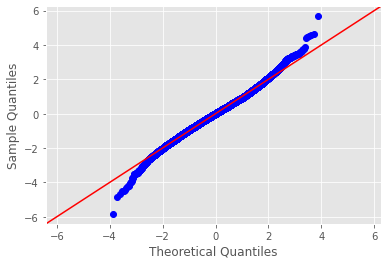

In [496]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

In [497]:
hddf_log5.columns

Index(['bedrooms', 'bathrooms', 'floors', 'age', 'yrsince_reno', 'zipcode',
       'lat', 'cond_4', 'cond_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'view_1', 'view_2', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_lot15', 'log_price'],
      dtype='object')

In [498]:
feat5 =['bedrooms', 'bathrooms', 'floors', 'age', 'yrsince_reno', 'zipcode',
       'lat', 'cond_4', 'cond_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'view_1', 'view_2', 'log_sqft_living',
       'log_sqft_living15', 'log_sqft_lot15']

In [500]:
corr = hddf_log5[feat5].corr()
corr

,bedrooms,bathrooms,floors,age,yrsince_reno,zipcode,lat,cond_4,cond_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_1,view_2,log_sqft_living,log_sqft_living15,log_sqft_lot15
bedrooms,1.000000,0.489689,0.162951,-0.164315,-0.168797,-0.169155,-0.038216,-0.001018,0.020764,-0.246310,-0.088595,0.099921,0.179404,0.115071,0.052353,0.013341,0.038939,0.635194,0.409527,0.203902
bathrooms,0.489689,1.000000,0.516265,-0.547790,-0.566711,-0.216390,0.000855,-0.176416,-0.040413,-0.385258,-0.289725,0.268684,0.302941,0.237462,0.110289,0.029876,0.069086,0.727878,0.538307,0.008520
floors,0.162951,0.516265,1.000000,-0.508170,-0.516008,-0.061069,0.039963,-0.264793,-0.127055,-0.231535,-0.305347,0.232196,0.268483,0.166248,0.078668,-0.024609,-0.002044,0.357119,0.266251,-0.317768
age,-0.164315,-0.547790,-0.508170,1.000000,0.933311,0.341595,0.156383,0.255351,0.243569,0.317887,0.216980,-0.229988,-0.242574,-0.152947,-0.065392,0.038708,0.058014,-0.357208,-0.350052,0.039120
yrsince_reno,-0.168797,-0.566711,-0.516008,0.933311,1.000000,0.318577,0.146235,0.280667,0.256343,0.320999,0.222051,-0.237141,-0.246337,-0.151051,-0.061677,0.034265,0.048095,-0.370342,-0.338946,0.047996
zipcode,-0.169155,-0.216390,-0.061069,0.341595,0.318577,1.000000,0.280508,-0.073937,0.056937,0.156493,0.065900,-0.073286,-0.098607,-0.070727,-0.030575,0.049449,0.076779,-0.231981,-0.308009,-0.269915
lat,-0.038216,0.000855,0.039963,0.156383,0.146235,0.280508,1.000000,-0.055237,0.025829,-0.063824,-0.032439,0.030775,0.045612,0.052741,0.021423,0.013699,0.008460,0.022139,0.028629,-0.124434
cond_4,-0.001018,-0.176416,-0.264793,0.255351,0.280667,-0.073937,-0.055237,1.000000,-0.175339,0.051784,0.104006,-0.055239,-0.090738,-0.067833,-0.033766,0.020886,0.006977,-0.075363,-0.066168,0.173467
cond_5,0.020764,-0.040413,-0.127055,0.243569,0.256343,0.056937,0.025829,-0.175339,1.000000,0.055452,0.051887,-0.041371,-0.050093,-0.045734,-0.021140,0.007325,0.020634,-0.023654,-0.080173,0.008751
grade_6,-0.246310,-0.385258,-0.231535,0.317887,0.320999,0.156493,-0.063824,0.051784,0.055452,1.000000,-0.295947,-0.212465,-0.118415,-0.066731,-0.026778,-0.020548,-0.038790,-0.407853,-0.341408,-0.003003


In [ ]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

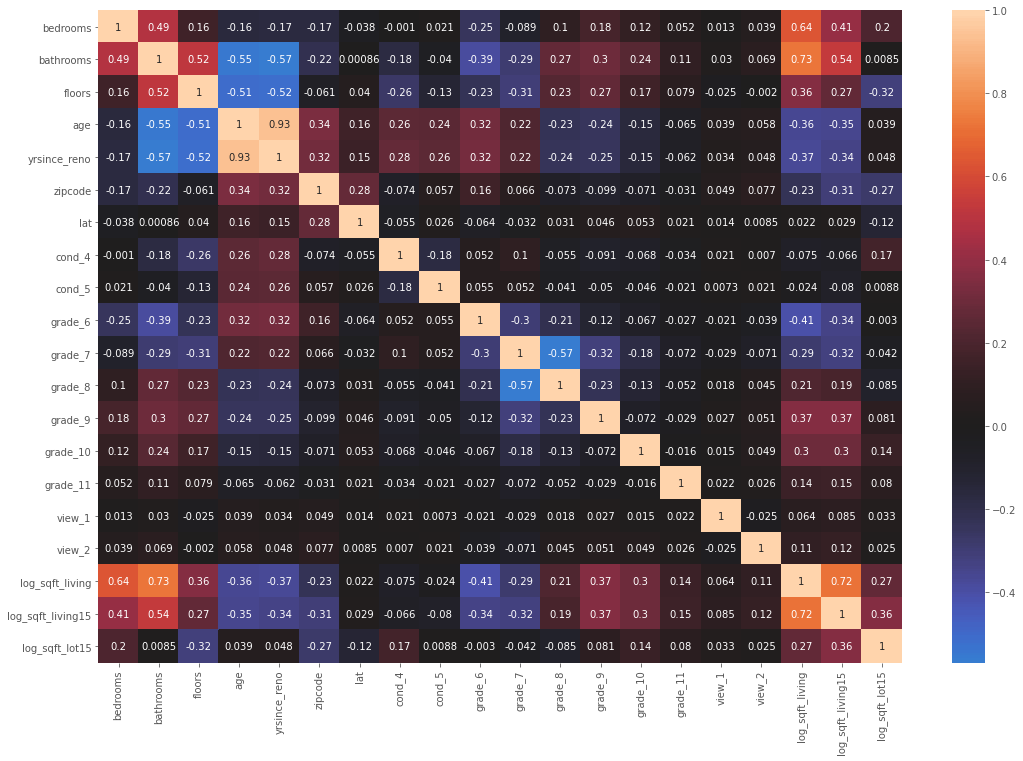

In [502]:
plt.figure(figsize=(18,12))
sns.heatmap(corr, center=0, annot=True);